In [198]:
import pandas as pd
from google.colab import files
import io
uploaded=files.upload()
data= pd.read_csv(io.BytesIO(uploaded["lung.csv"]))
#data = pd.read_csv("C:\\Users\\Rishivarun\\Downloads\\lungcancer\\lung.csv")

Saving lung.csv to lung (10).csv


In [207]:

data.replace({'F': 0, 'M': 1}, inplace=True)
data.replace({'YES': 2, 'NO': 1}, inplace=True)
x = data.drop("LUNG_CANCER", axis = 1)
y = data["LUNG_CANCER"]

TypeError: ignored

In [208]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y , test_size = 0.2, random_state=47)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [209]:
import tensorflow as tf
from tensorflow import keras

In [210]:
model = keras.models.Sequential(
[keras.layers.Flatten(input_shape=[15]),    
keras.layers.Dense(250, activation="relu"),
keras.layers.Dense(10, activation="sigmoid"),
keras.layers.Dense(2, activation="tanh")
])

In [211]:
model.compile(
              loss="mean_absolute_error",
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy","mean_absolute_error","mean_squared_error",'mean_absolute_percentage_error'])


In [212]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)

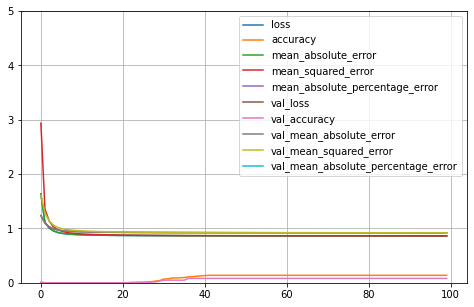

In [213]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

In [214]:
score = model.evaluate(x,y)

10/10 [==============================] - 0s 2ms/step - loss: 0.8743 - accuracy: 0.1262 - mean_absolute_error: 0.8743 - mean_squared_error: 0.8747 - mean_absolute_percentage_error: 43.7177
